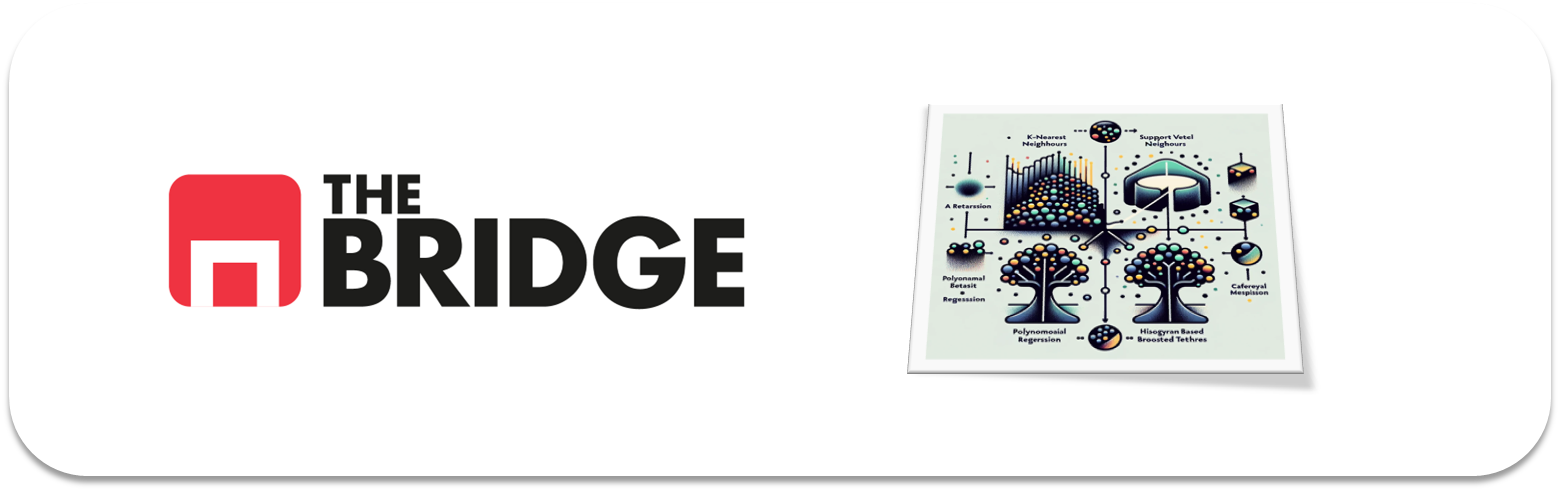

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import bootcampviztools as viz
import ToolBox as tb

from sklearn.metrics import classification_report, root_mean_squared_error, mean_absolute_error, mean_squared_error, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import classification_report, root_mean_squared_error, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRFRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [4]:
df = pd.read_csv("./data/wines_dataset.csv", sep = "|")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
tb.cardinalidad(df)

,nombre_variable,valores_unicos,cardinalidad,tipo_sugerido
0,fixed acidity,106,0.016315,Numerica Discreta
1,volatile acidity,187,0.028783,Numerica Discreta
2,citric acid,89,0.013699,Numerica Discreta
3,residual sugar,316,0.048638,Numerica Discreta
4,chlorides,214,0.032938,Numerica Discreta
5,free sulfur dioxide,135,0.020779,Numerica Discreta
6,total sulfur dioxide,276,0.042481,Numerica Discreta
7,density,998,0.153609,Numerica Discreta
8,pH,108,0.016623,Numerica Discreta
9,sulphates,111,0.017085,Numerica Discreta


In [8]:
tb.describe_df(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
DATA_TYPE,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,object
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,106,187,89,316,214,135,276,998,108,111,111,7,2
CARDIN (%),0.016315,0.028783,0.013699,0.048638,0.032938,0.020779,0.042481,0.153609,0.016623,0.017085,0.017085,0.001077,0.000308


*La mayoría parecen numéricas discretas, menos las dos últimas, que son categórica y binaria (quality es nuestro target de clasificación) y density que podría ser numérica continua.*

In [9]:
target_c = "quality"
target_r = "alcohol"

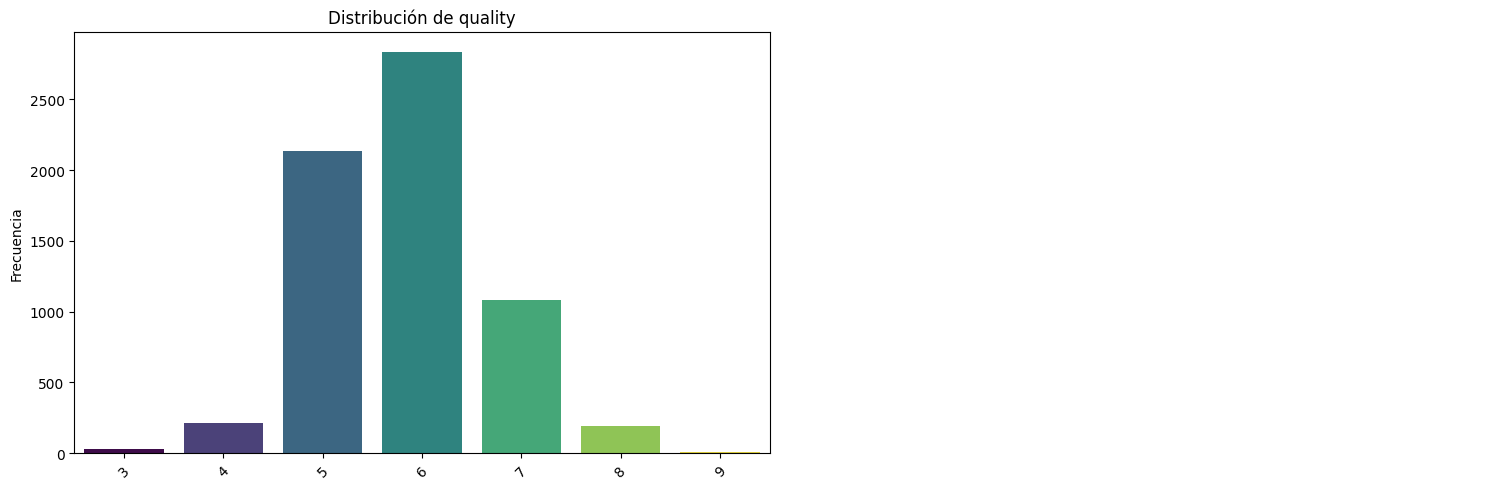

In [11]:
viz.pinta_distribucion_categoricas(df, [target_c])

*La mayoría de valores se reparten entre el 5 y el 6, con concentración también en el 7 y mucho menos en los demás, por lo que es un dataset bastante desequilibrado y nos va a dar problemas con los grupos más minoritarios (3,4,8,9), no tenemos valores menores de 3 ni mayores de 9.*

(2,)


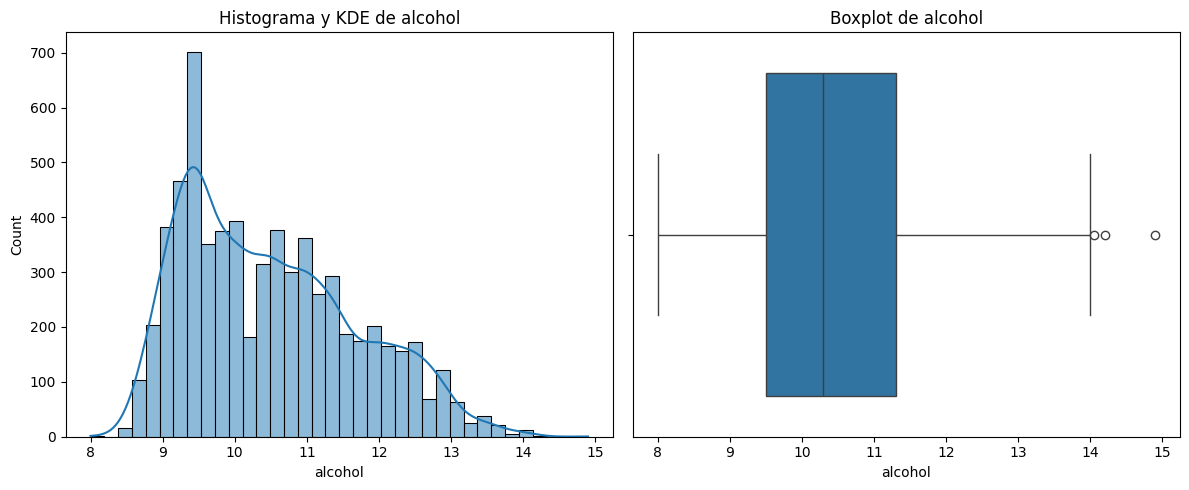

In [13]:
viz.plot_combined_graphs(df, [target_r])

*La distribución no es normal, pero tampoco tiene una larga cola, tiene mayor concentración al principio, entre 9 y 10 grados y luego va descendiendo paulatinamente hasta los 15, donde ya casi no hay valores, pero, como vemos, tiene pocos outliers.*

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

Siguiendo el esquema:
1. Entendimiento del problema (selección de la métrica más adecuada)  
2. Obtención de datos y primer contacto  
3. Train y Test  <- PARTIMOS DE AQUI
4. MiniEDA: Análisis del target, análisis bivariante, entendimiento de las features, selección de las mismas (si es necesario)
    Categoricas -> 0-1 -> MinMax (a,b), con a < b
    Categoricas -> 0 a 10 y numericas -> StandardScaler -> 2 juegos 
5. Preparación del dataset de Train: Conversión de categóricas, tratamiento de numéricas  
6. Selección e instanciación de modelos. Baseline.
7. Comparación de modelos (lo haremos por comparación con validación, puedes hacerlo por comparación de modelos de hiperparámetros optimizados, si así lo prefieres)  TIEMPO es la clave -> 1) Tuneo/Ajusto los hiperparámetros; 2) validación cruzada (set de validación)
8. Selección de modelo: Optimización de hiperparámetros (ten en cuenta la nota de 7) (hiperparametro -> class_weight)
9. Equilibrado del train set  (Oversampling SMOTE, Undersampling....)
10. Evaluación contra test.  
11. Análisis de errores, posibles acciones futuras.  
12. EXTRA: Persistencia del modelo en disco.

*Lo primero que voy a hacer es pasar la binaria a números.*

In [15]:
df["class"] = df["class"] == "white"
df["class"] = df["class"].astype(int)

*Separo train y test*

In [17]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

*Analizo la categórica.*

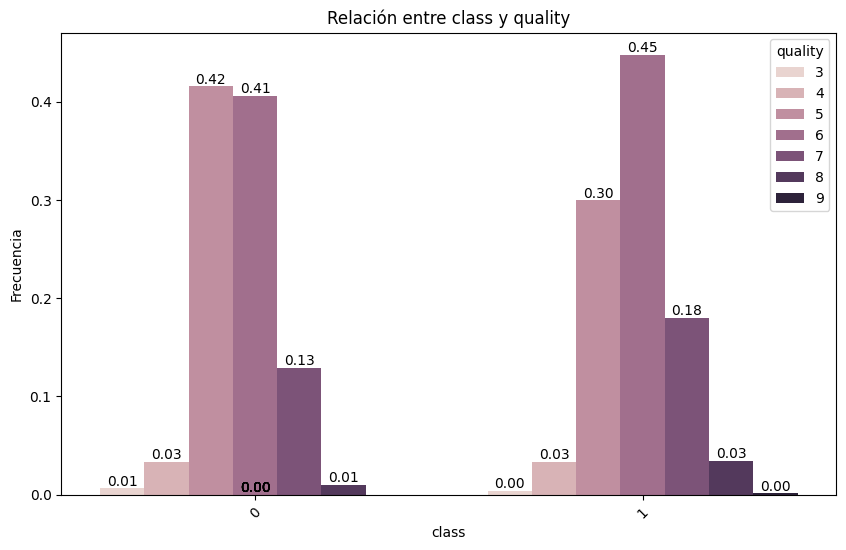

In [20]:
viz.plot_categorical_relationship_fin(train, "class", target_c, relative_freq=True, show_values=True)

*Sí que parecen estar relacionadas, así que me la quedo, voy a ver ahora con las numéricas.*

In [21]:
f_cat = "class"

In [24]:
f_num = train.drop(columns= [target_c] + [f_cat]).columns.to_list()

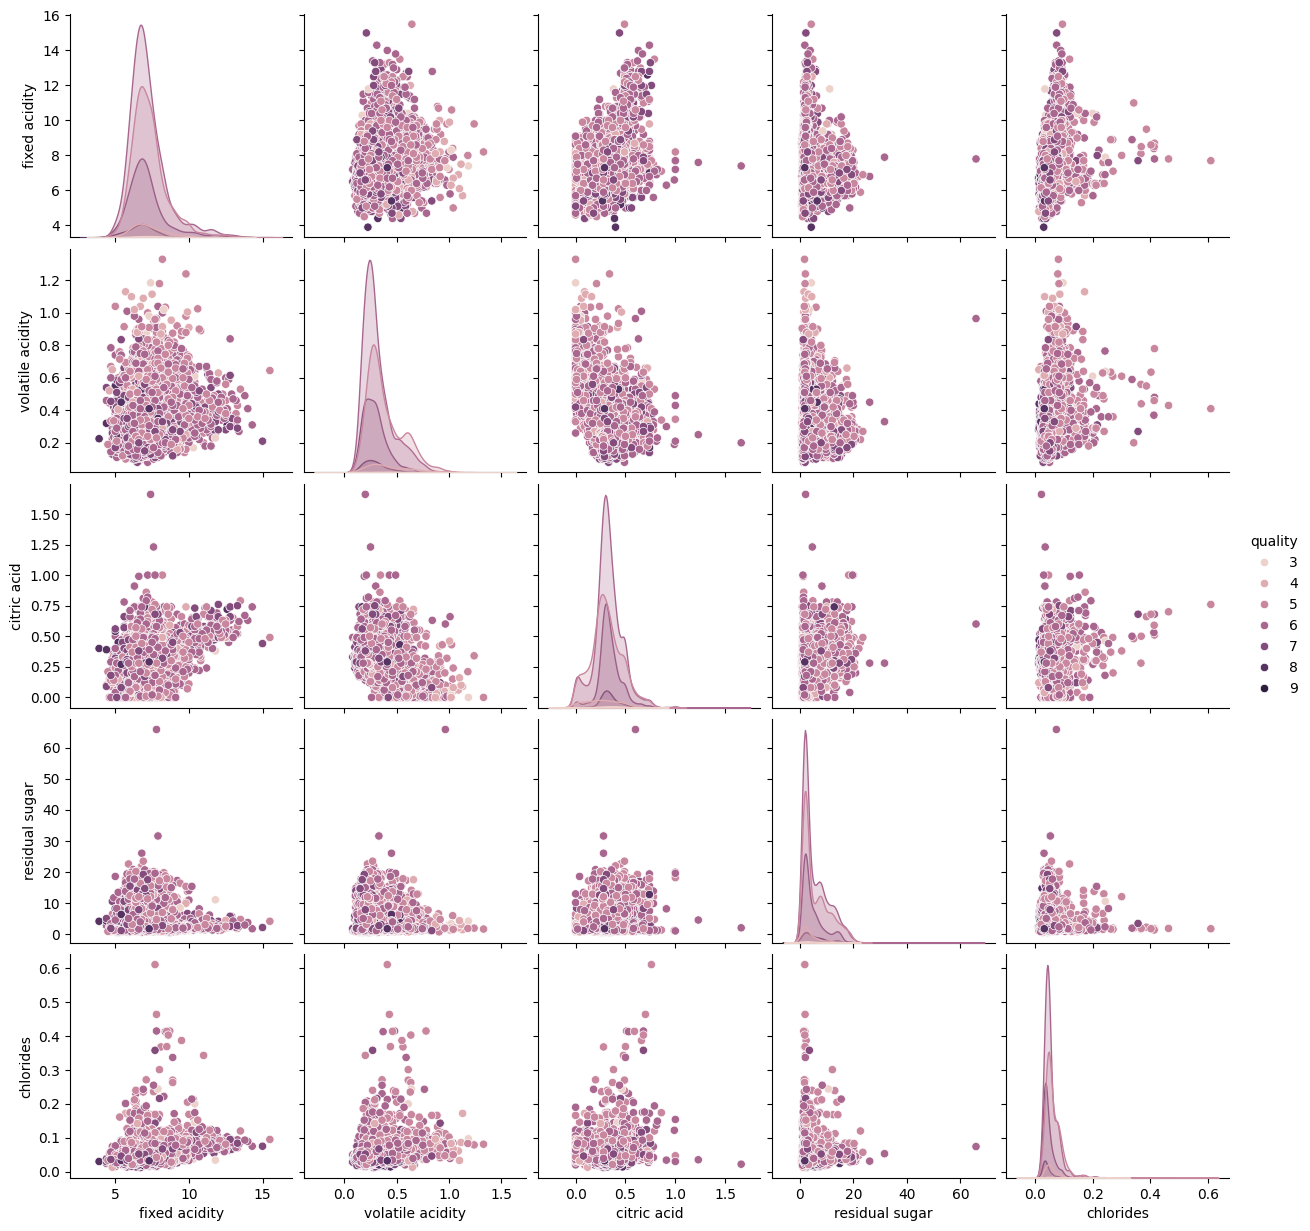

In [25]:
sns.pairplot(train[f_num[0:5] + [target_c]], hue= target_c)

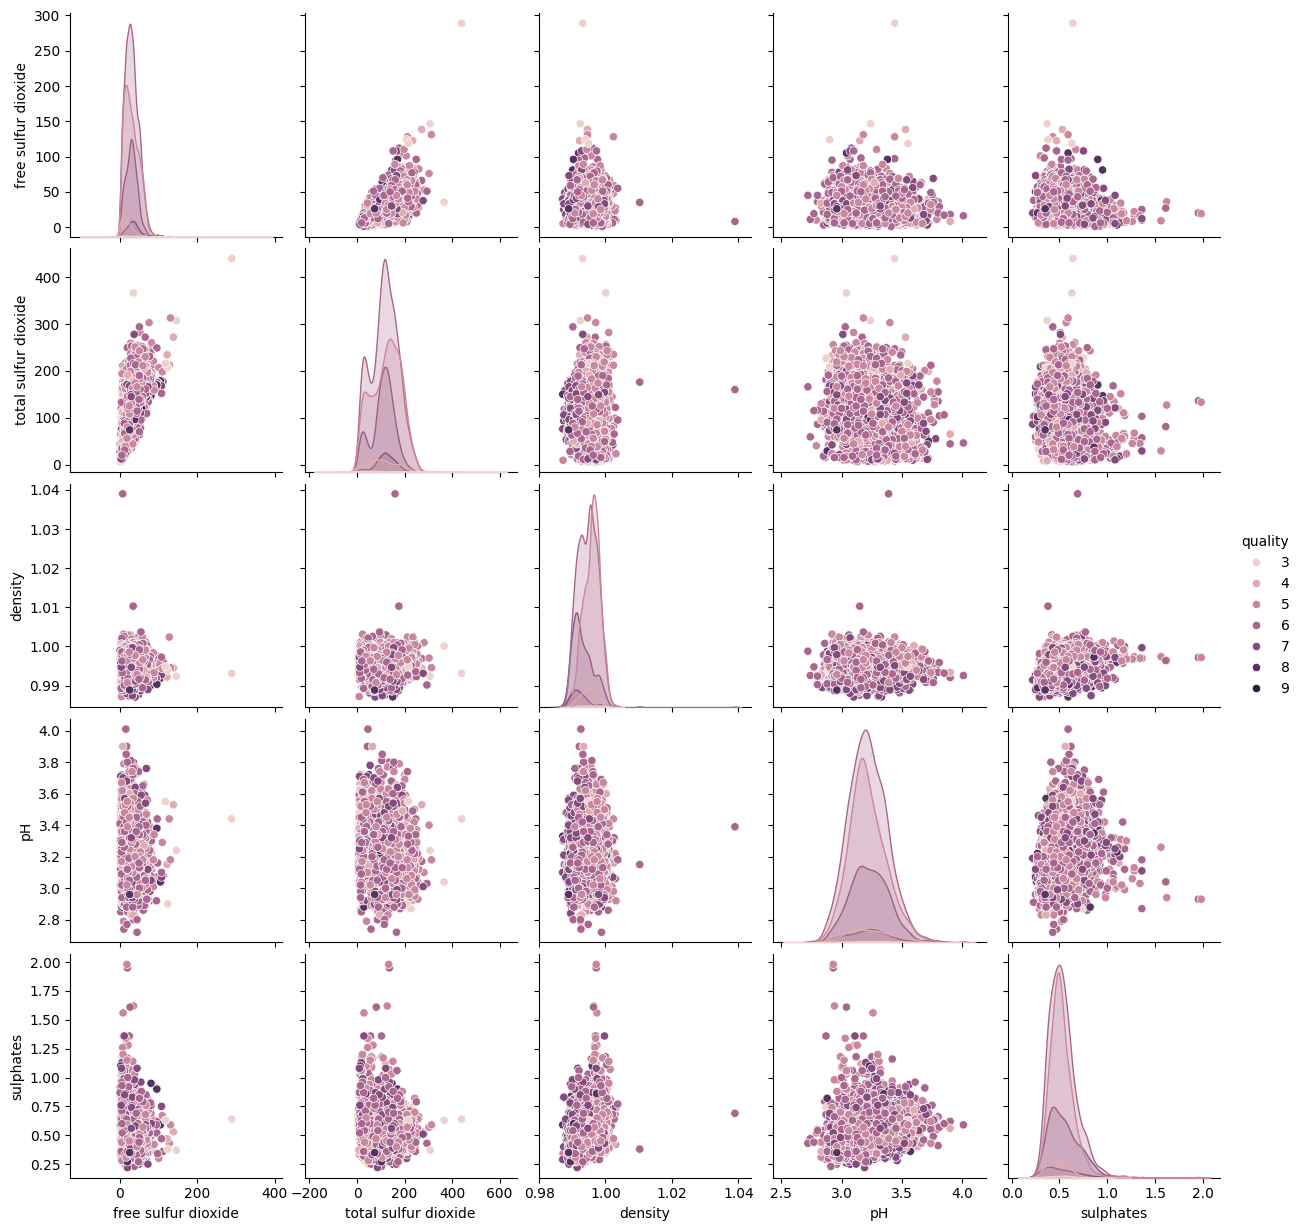

In [26]:
sns.pairplot(train[f_num[5:10] + [target_c]], hue= target_c)

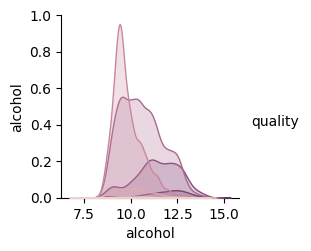

In [27]:
sns.pairplot(train[f_num[10:] + [target_c]], hue= target_c)

*Todas parecen tener algo de relación, quizá las que menos sean pH y fixed acidity y alguna otra que no se ve muy bien, tendría que verlas más ampliadas, pero no tengo tiempo y como son pocas me las voy a quedar todas, voy a hacer de todas formas es test ANOVA por si acaso.*

#### *Probablemente sería mejor haber usado cajas o violines en función de los valores de la categórica, se ve mejor.*

In [28]:
from scipy.stats import f_oneway
for col in train[f_num]:        
    groups = train[target_c].unique()
    target_values_x_group = [train.loc[train[target_c] == group, col] for group in groups]
    _, p_val = f_oneway(*target_values_x_group)
    print(f"Para '{col}' y '{target_c}' el p-value es: {p_val} (Test aplicado: ANOVA)")

Para 'fixed acidity' y 'quality' el p-value es: 1.573770156134556e-06 (Test aplicado: ANOVA)
Para 'volatile acidity' y 'quality' el p-value es: 1.749629818028658e-85 (Test aplicado: ANOVA)
Para 'citric acid' y 'quality' el p-value es: 2.1215249812118301e-10 (Test aplicado: ANOVA)
Para 'residual sugar' y 'quality' el p-value es: 1.9912535243757454e-09 (Test aplicado: ANOVA)
Para 'chlorides' y 'quality' el p-value es: 1.0011473306365174e-49 (Test aplicado: ANOVA)
Para 'free sulfur dioxide' y 'quality' el p-value es: 4.308167621663142e-15 (Test aplicado: ANOVA)
Para 'total sulfur dioxide' y 'quality' el p-value es: 1.597616494867327e-09 (Test aplicado: ANOVA)
Para 'density' y 'quality' el p-value es: 1.1795013189273782e-132 (Test aplicado: ANOVA)
Para 'pH' y 'quality' el p-value es: 0.06441383319828431 (Test aplicado: ANOVA)
Para 'sulphates' y 'quality' el p-value es: 2.0097322780437836e-05 (Test aplicado: ANOVA)
Para 'alcohol' y 'quality' el p-value es: 3.833027779300525e-302 (Test aplic

*La única que podría descartarse con confianza estadística que está relacionada con el target es pH, pero como tengo pocas variables me voy a quedar todas, además, está muy cercana al umbral de 0.05.*

*Voy a ver un mapa de calor para ver si están muy relacionadas entre sí.*

<Axes: >

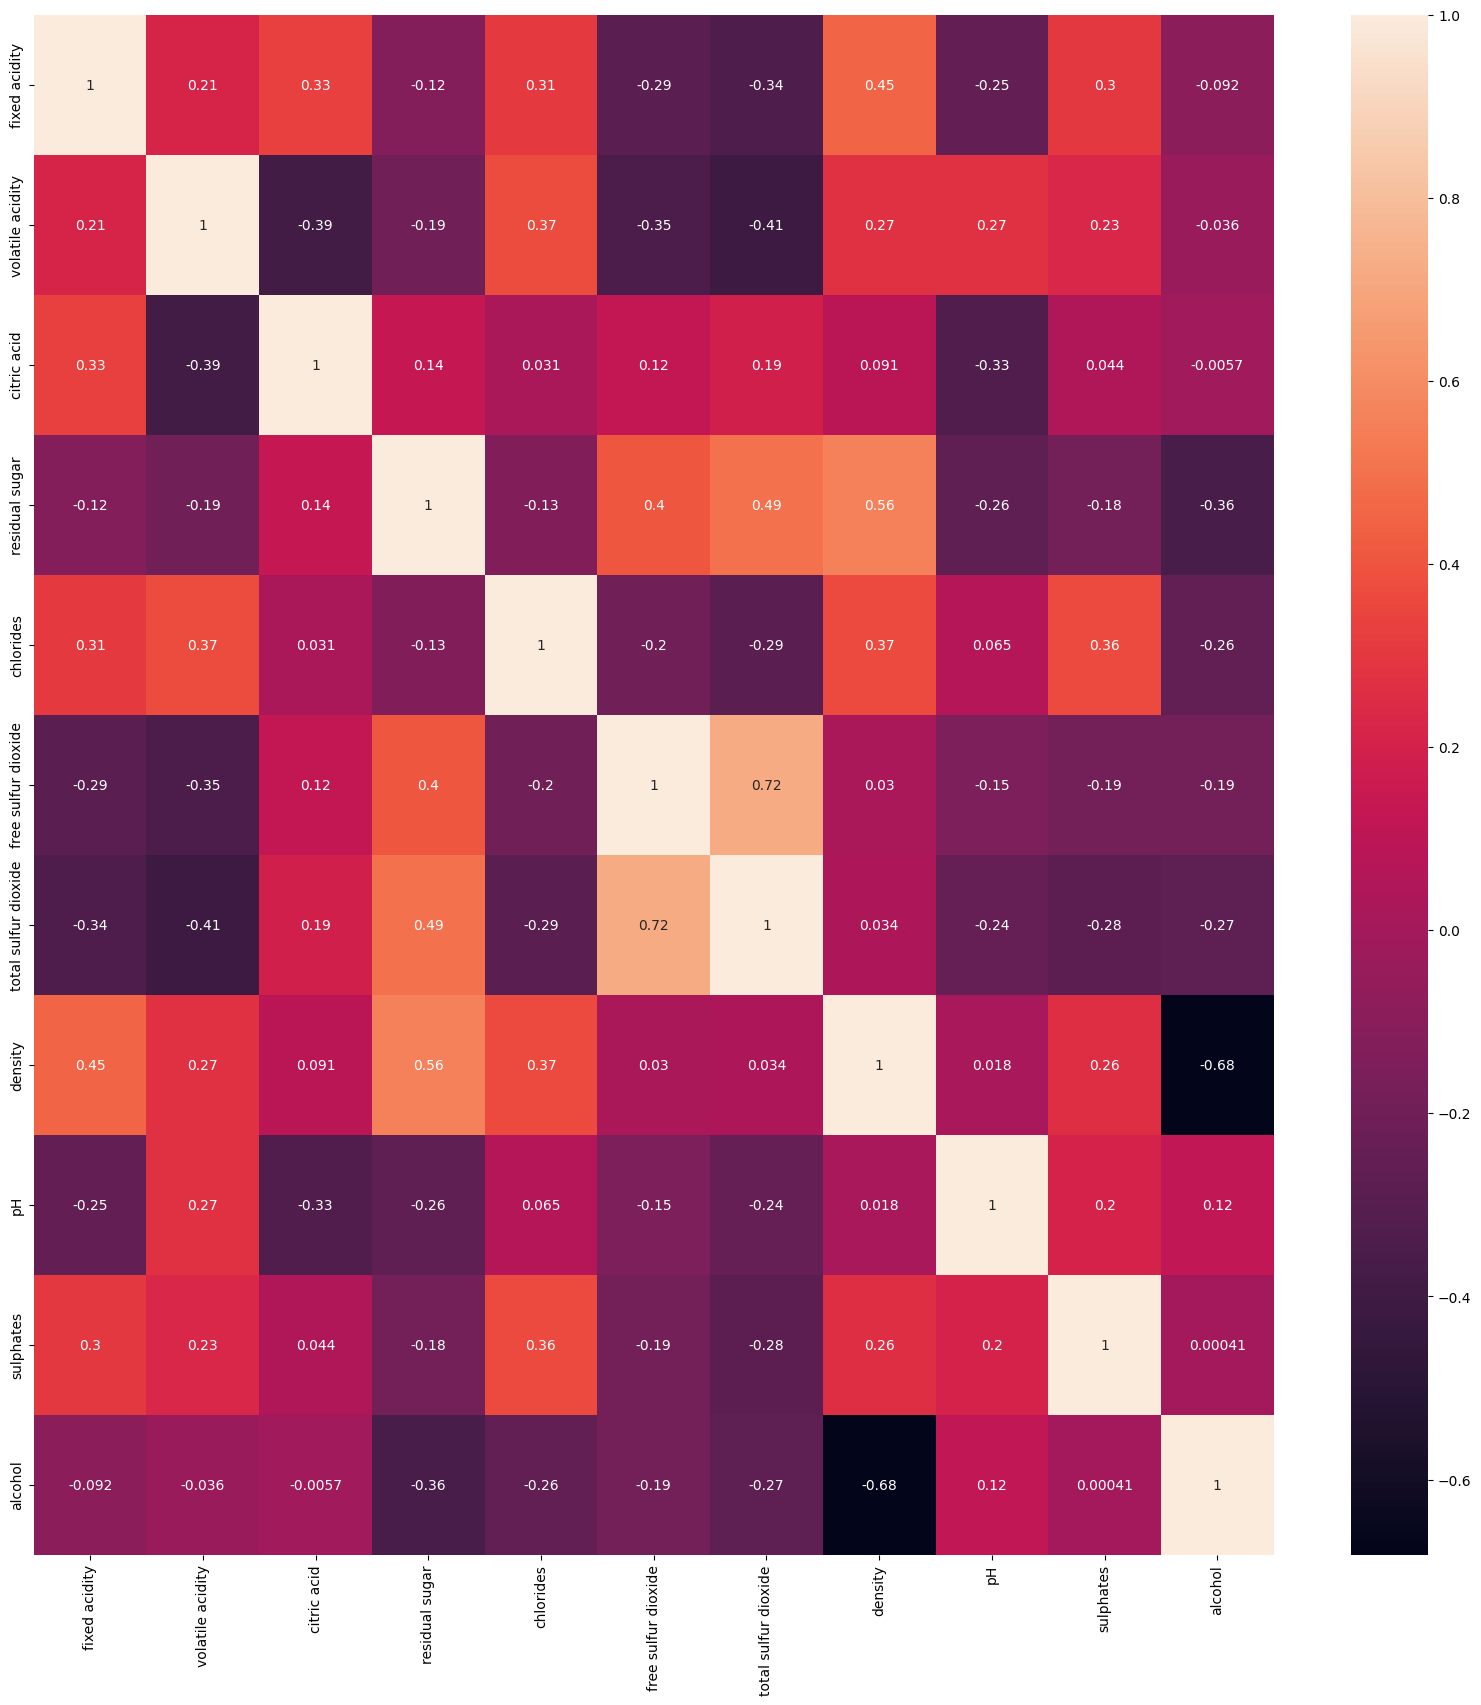

In [29]:
plt.figure(figsize=(20, 20))
sns.heatmap(train[f_num].corr(), annot=True)

*No parecen tener correlaciones muy fuertes entre sí, por lo cual me las voy a quedar todas, este análisis sirve ya para el problema de regresión también, hay algunas que tienen una correlación muy baja y que en este caso probablemente voy a descartar, como son citric acid y sulphates, pero quizá al ser pocas pruebe con todas.*

*Voy a ver primero sus distribuciones por si necesitan alguna transformación antes del escalado y a escalarlas después para los modelos que son sensibles a las escalas.*

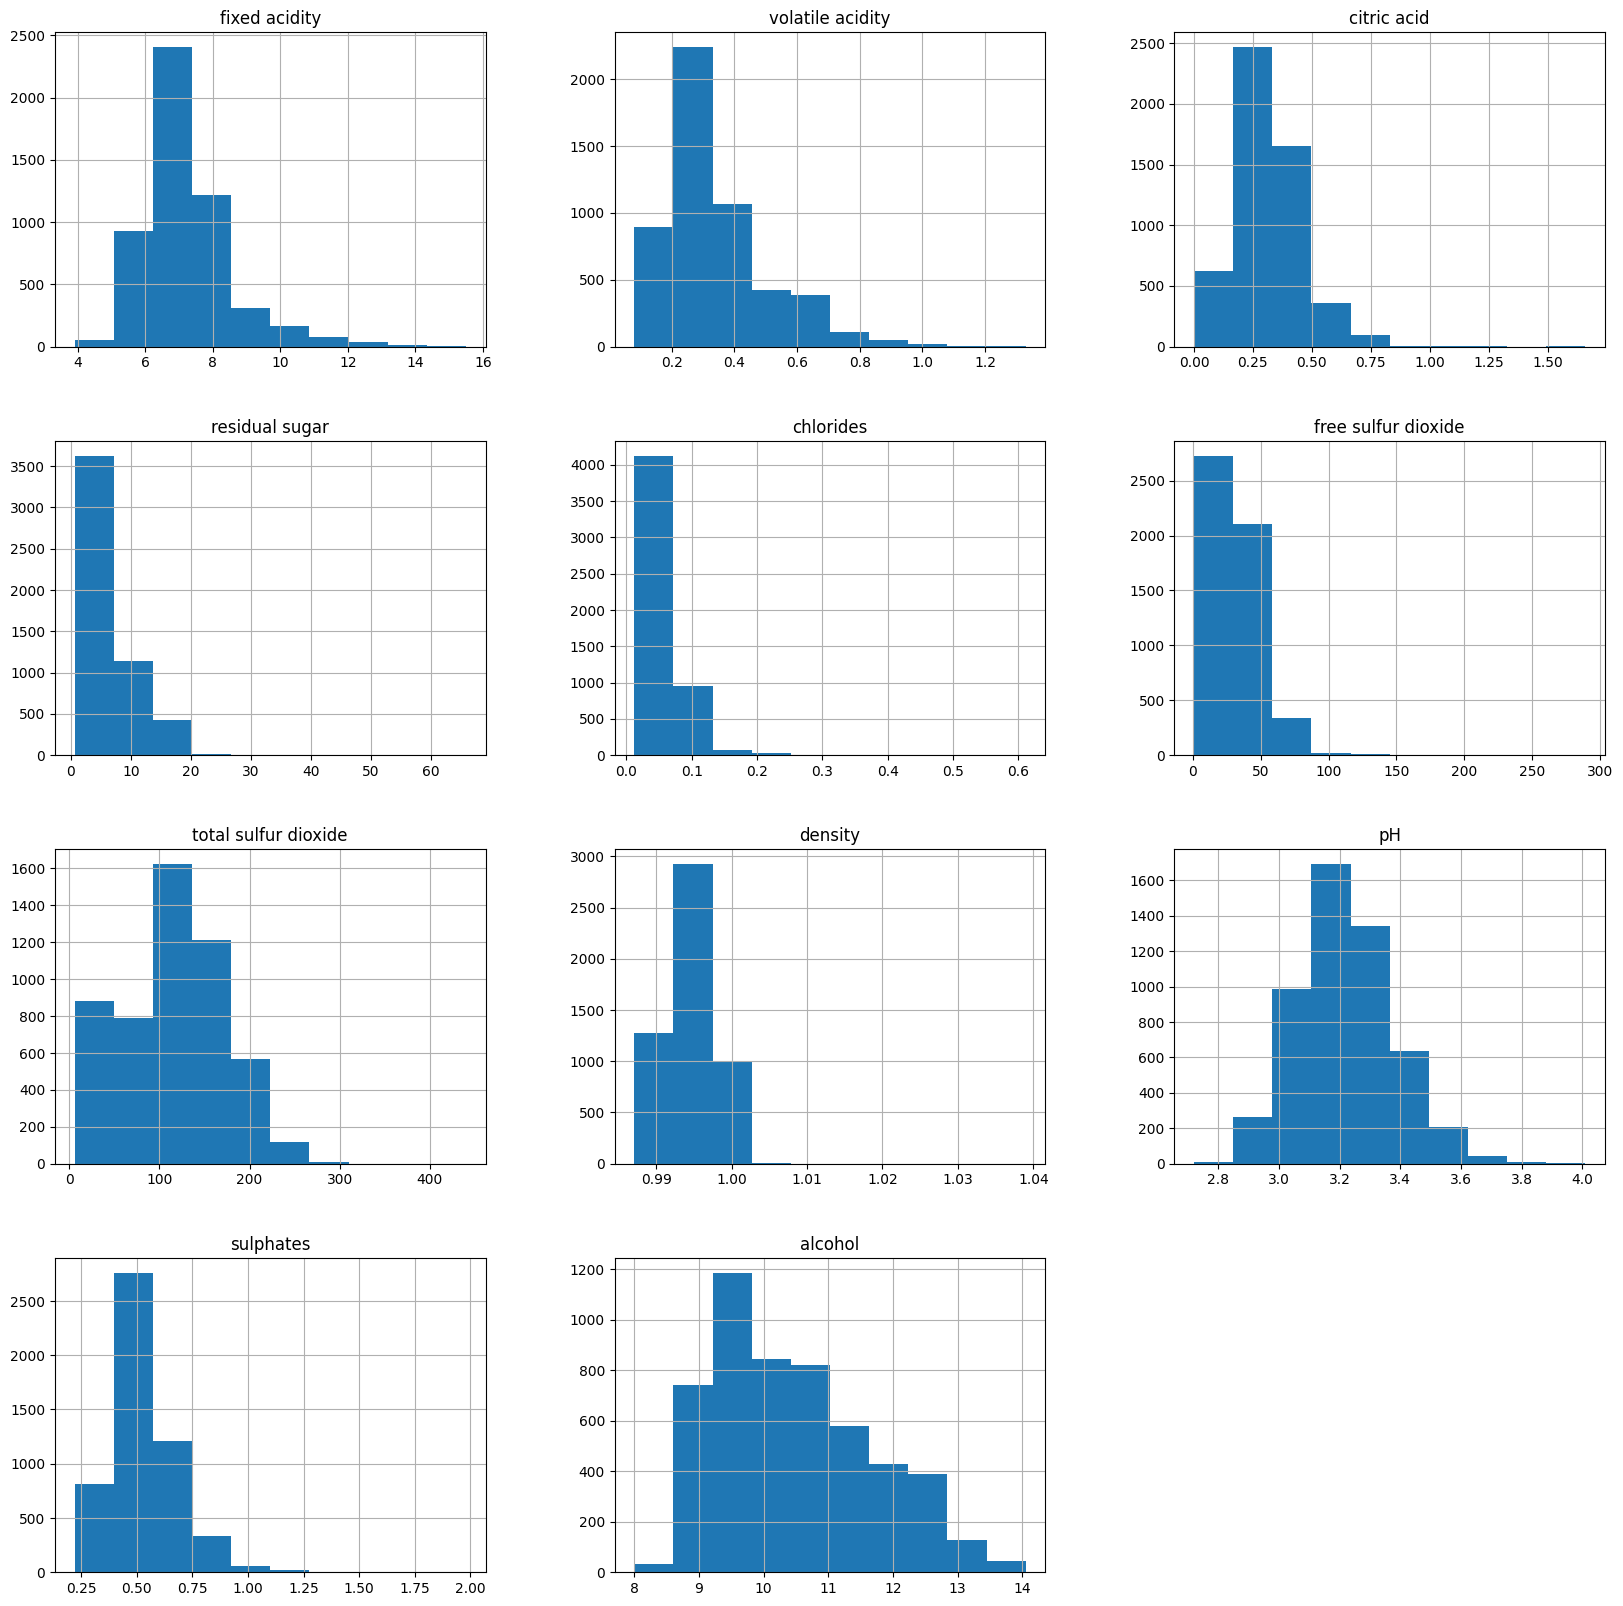

In [104]:
train[f_num].hist(figsize = (20,20));

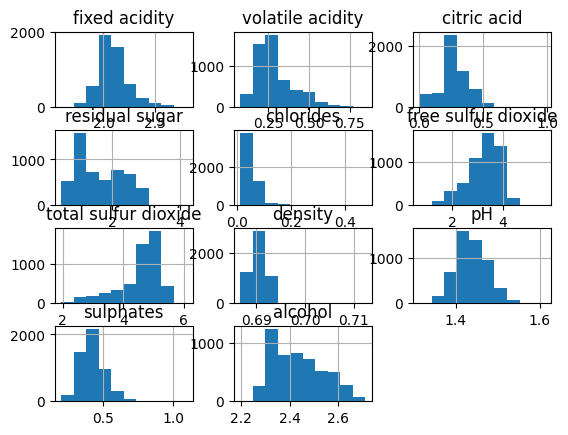

In [33]:
train[f_num].apply(np.log1p).hist();

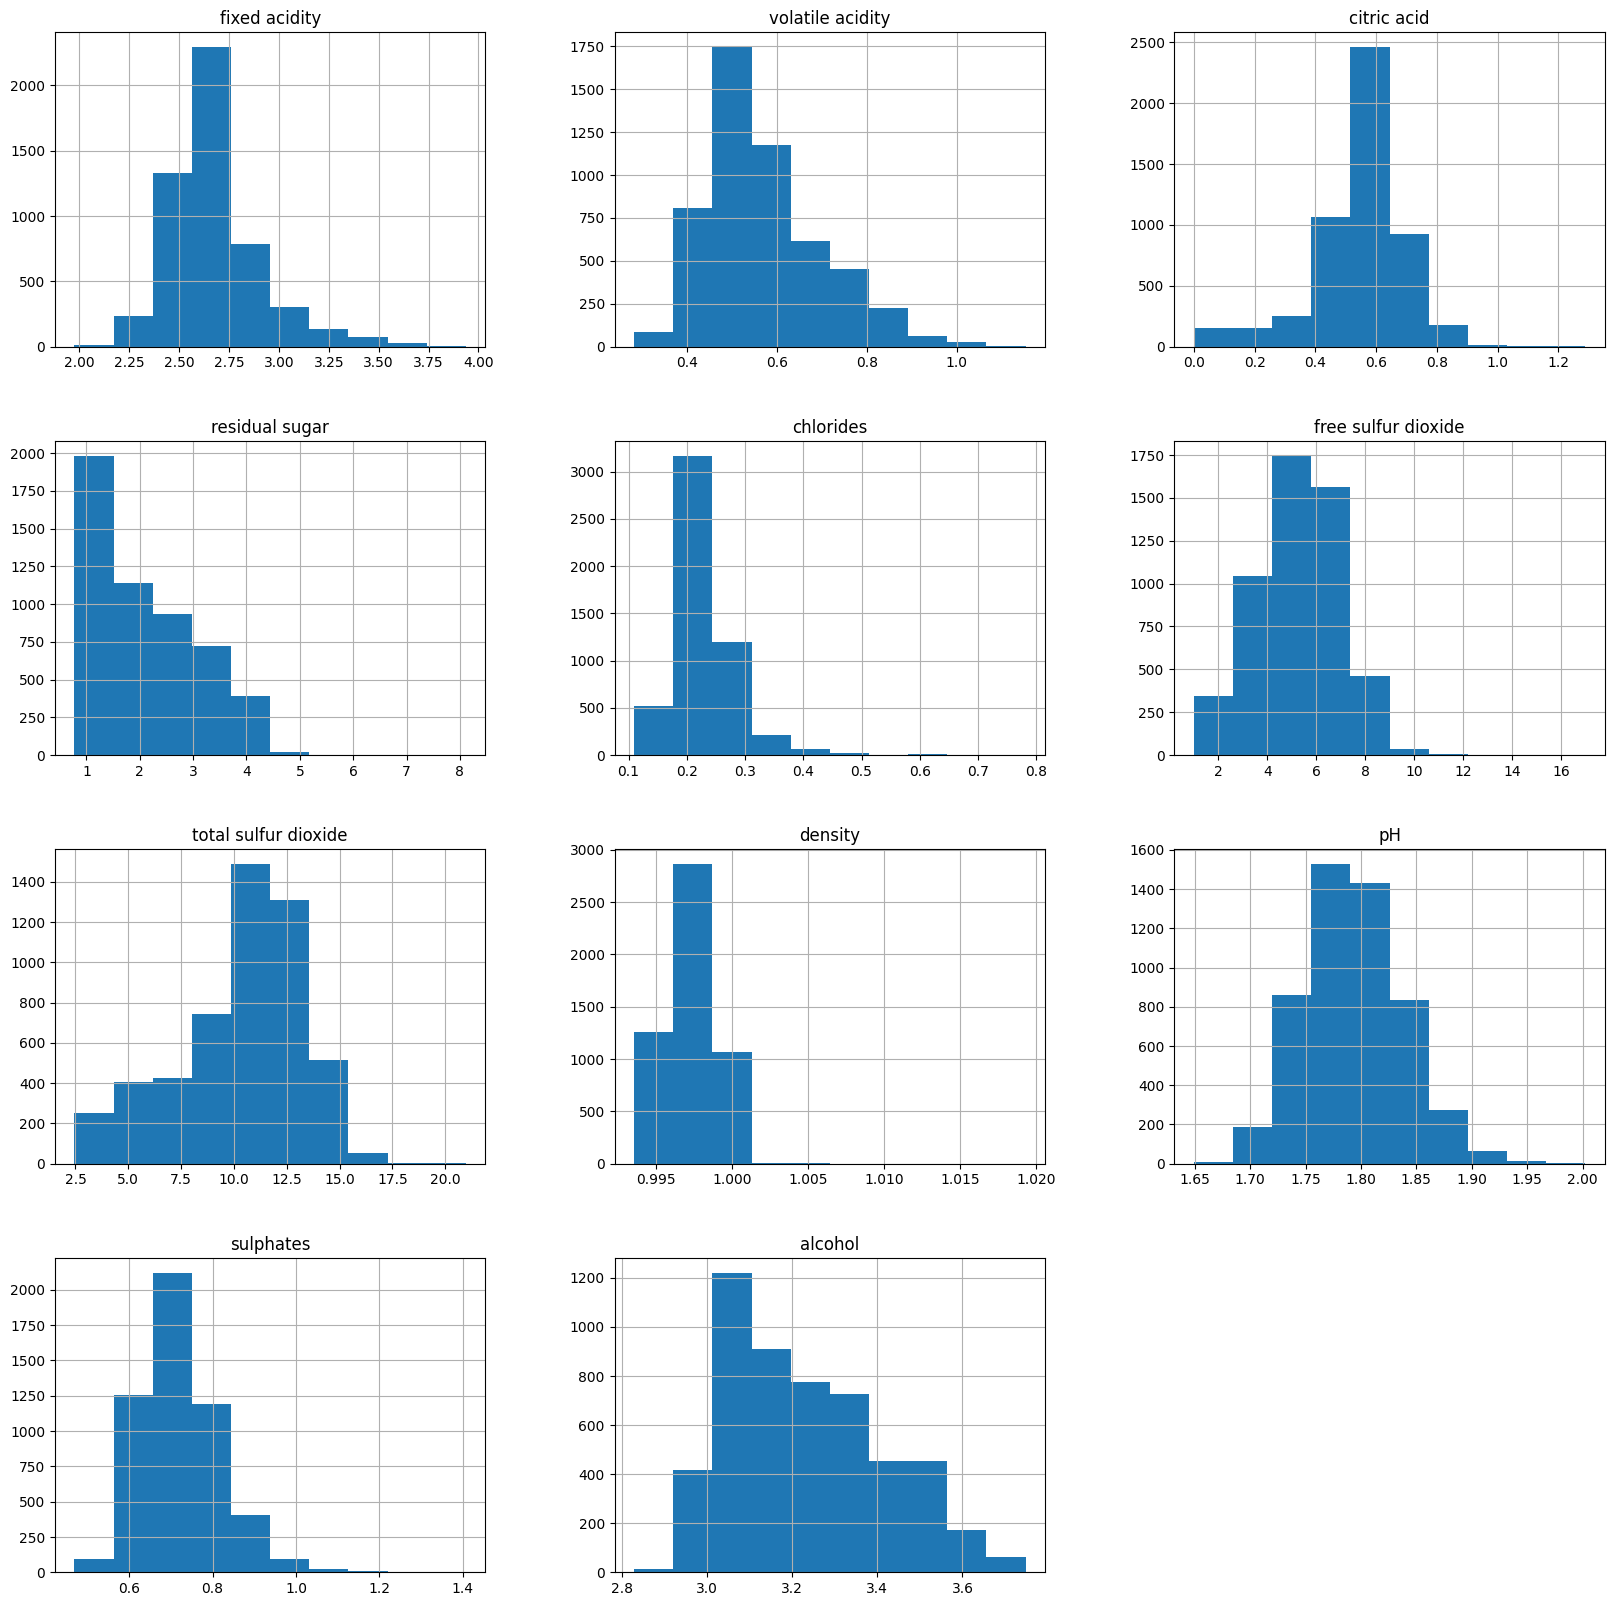

In [105]:
train[f_num].apply(np.sqrt).hist(figsize = (20,20));

*Parece que una transformación va mejor para unas y otra para otras, pero me voy a quedar con la raiz cuadrada porque no tiene ninguna completamente desastrosa. Se la voy a aplicar a todas porque ninguna empeora.*

*Código para visualizar todo junto, la distribución original, logarimo y raiz cuadrada.*

In [ ]:
fig, ax = plt.subplots(len(features_num_clf),3, figsize=(20,50))
for index, feature in enumerate(features_num_clf):
# Aplicamos raíz cuadrada a las features ya que algunas tienen valor 0 como mínimo 
    log_feature = np.log1p(train_set[feature])
    sqrt_feature = np.sqrt(train_set[feature])
    sns.histplot(train_set, x=feature, hue='class', bins=50, kde=True, ax=ax[index, 0])
    sns.histplot(train_set, x=log_feature, hue='class', bins=50, kde=True, ax=ax[index, 1])
    sns.histplot(train_set, x=sqrt_feature, hue='class', bins=50, kde=True, ax=ax[index, 2])
    ax[index, 0].set_xlabel('')
    ax[index, 1].set_xlabel('')
    ax[index, 2].set_xlabel('')
    ax[index, 0].set_ylabel(feature)
    ax[index, 1].set_ylabel('')
    ax[index, 2].set_ylabel('')
plt.tight_layout();

In [35]:
train_scaled = train.copy()
test_scaled = test.copy()

In [36]:
train_scaled[f_num] = train_scaled[f_num].apply(np.sqrt)
test_scaled[f_num] = test_scaled[f_num].apply(np.sqrt)

In [40]:
scaler = StandardScaler()

train_scaled[f_num] = scaler.fit_transform(train_scaled[f_num])
test_scaled[f_num] = scaler.transform(test_scaled[f_num])

*Voy a pasar los valores del target a valores de 0 a 6 para que funcione, sabiendo que luego hay que sumarles 3 a las predicciones. Los guardo solo para los conjuntos y, para no cambiarlos y poder usar los valores originales en la regresión si lo necesito.*

In [51]:
transf_target = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5,
    9: 6
}


*Separo en X, y*

In [44]:
features = f_num + [f_cat]

In [52]:
X_train = train[features]
X_train_scaled = train_scaled[features]
y_train = train[target_c].map(transf_target)

X_test = test[features]
X_test_scaled = test_scaled[features]
y_test = test[target_c].map(transf_target)

*Voy a instaciar y probar los diferentes modelos para ver cuál optimizo. Además con el random forest voy a ver la importancia de las features.*

In [106]:
nombres_modelos = ["Regresión Logística", "Random Forest", "XGBoost", "LightGBM", "KNN"]

log_reg = LogisticRegression(max_iter= 10000)
rfc = RandomForestClassifier(random_state=42, max_depth= 5)
xgbc = XGBClassifier(max_depth = 10, random_state = 42)
lgbmc = LGBMClassifier(max_depth = 10, random_state=42, verbose = -100)
knn = KNeighborsClassifier()

modelos = [log_reg, rfc, xgbc, lgbmc, knn]

In [107]:
dict_cv = {}
scores = []

for nombre, modelo in zip(nombres_modelos, modelos):
    if modelo not in ["Regresión logística", "KNN"] :
        cv_score = cross_val_score(modelo, X_train, y_train, cv=5, scoring= "balanced_accuracy")
        dict_cv[nombre] = cv_score
        scores.append(np.mean(cv_score))
    else:
        cv_score = cross_val_score(modelo, X_train_scaled, y_train, cv=5, scoring= "balanced_accuracy")
        dict_cv[nombre] = cv_score
        scores.append(np.mean(cv_score))
ganador = list(dict_cv.keys())[np.argmax(scores)]
print(ganador)

c:\Users\dario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

XGBoost


In [108]:
for nombre, puntuacion in dict_cv.items():
    print(f"La sensibilidad media para el {nombre} es de {np.mean(puntuacion)}")
print(f"El ganador es {ganador}, con una puntuación de {np.mean(dict_cv[ganador])}")

La sensibilidad media para el Regresión Logística es de 0.21919676756682477
La sensibilidad media para el Random Forest es de 0.2141386727149926
La sensibilidad media para el XGBoost es de 0.3440116561278227
La sensibilidad media para el LightGBM es de 0.33699160223056795
La sensibilidad media para el KNN es de 0.2181468824932818
El ganador es XGBoost, con una puntuación de 0.3440116561278227


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.99      0.83      0.90       173
           2       0.85      0.84      0.85      1706
           3       0.81      0.88      0.84      2274
           4       0.90      0.76      0.83       869
           5       1.00      0.84      0.91       146
           6       1.00      1.00      1.00         5

    accuracy                           0.85      5197
   macro avg       0.94      0.88      0.90      5197
weighted avg       0.85      0.85      0.85      5197



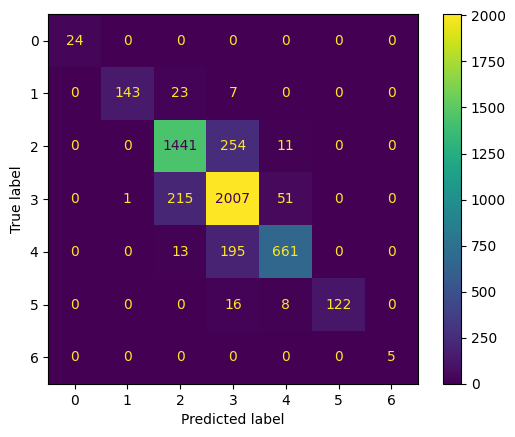

In [56]:
lgbmc = LGBMClassifier(max_depth= 5)
lgbmc.fit(X_train, y_train)
pred_train = lgbmc.predict(X_train)
print(classification_report(y_train, pred_train))
c_matrix = ConfusionMatrixDisplay(confusion_matrix= "cm")
c_matrix.from_predictions(y_train, pred_train)


In [57]:
param_grid = {"max_depth": [3, 6, 12, -1],
              "learning_rate": [0.1, 0.3, 0.6, 1],
              "n_estimators": [100, 200, 400],
              "min_child_samples": [1, 20, 50, 100],
              "colsample_bytree": [0.5, 1],
              "subsample": [0.5, 1],
              "subsample_for_bin": [125, 250, 500, 1000, 2000],
              "class_weight": ["balanced", None]
}

lgbmc = LGBMClassifier()

clf = RandomizedSearchCV(lgbmc,
                   param_distributions= param_grid,
                   scoring= "balanced_accuracy",
                   cv = 5,
                   n_iter = 100,
                   random_state= 42,
                   n_jobs=-1)
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'colsample_bytree': [0.5, 1],
                                        'learning_rate': [0.1, 0.3, 0.6, 1],
                                        'max_depth': [3, 6, 12, -1],
                                        'min_child_samples': [1, 20, 50, 100],
                                        'n_estimators': [100, 200, 400],
                                        'subsample': [0.5, 1],
                                        'subsample_for_bin': [125, 250, 500,
                                                              1000, 2000]},
                   random_state=42, scoring='balanced_accuracy')

In [58]:
clf.best_params_

{'subsample_for_bin': 500,
 'subsample': 1,
 'n_estimators': 100,
 'min_child_samples': 100,
 'max_depth': -1,
 'learning_rate': 0.1,
 'colsample_bytree': 0.5,
 'class_weight': 'balanced'}

In [59]:
lgbmc_clf = clf.best_estimator_
pred_train_lgmbc = lgbmc_clf.predict(X_train)
pred_test_lgmbc = lgbmc_clf.predict(X_test)
print(classification_report(y_train, pred_train_lgmbc))
print(classification_report(y_test, pred_test_lgmbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.84      1.00      0.92       173
           2       0.84      0.89      0.87      1706
           3       0.93      0.78      0.85      2274
           4       0.78      0.98      0.87       869
           5       0.90      1.00      0.94       146
           6       1.00      1.00      1.00         5

    accuracy                           0.86      5197
   macro avg       0.90      0.95      0.92      5197
weighted avg       0.87      0.86      0.86      5197

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.37      0.37      0.37        43
           2       0.65      0.69      0.67       432
           3       0.65      0.53      0.59       562
           4       0.47      0.68      0.56       210
           5       0.62      0.51      0.56        47

    accuracy           

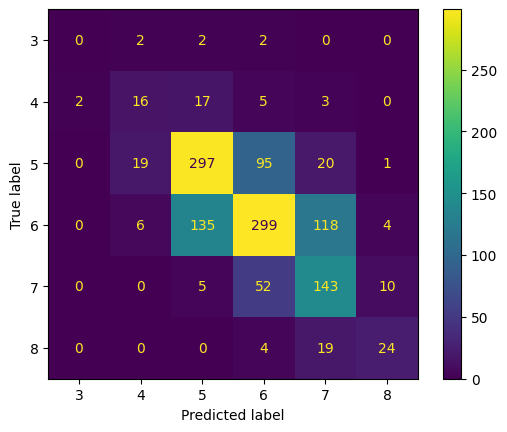

In [94]:
c_matrix = ConfusionMatrixDisplay(confusion_matrix= "cm")
c_matrix.from_predictions(y_test + 3, pred_test_lgmbc + 3)

*Las que mejor capta son las clases 5 y 7 (tienen el recall más alto), pero a costa de predecir los registros de la clase 6 muchas veces como 5 o 7, por eso la clase 6 tiene un recall bajo y una precisión relativamente alta (en comparación con las demás clases del modelo). La clase 8 también tiene una buena precisión, por lo que si el modelo predice que un vino tendrá un 8, con cierta confianza tendrá esa nota. En general, tiende a predecir hacia valores centrales, entre 5 y 7. La que peor predice es la clase 3, que no ha acertado ningún valor y la clase 4 la predice también bastante mal. En la zona alta, si predice 6 o más podemos tener cierta seguridad de que el valor estará en esa zona y es más probable que acierte si predice 6 u 8 que si predice 7.*

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

*Voy a crear dos listas de features para probarlas las dos*

In [61]:
features_r = train.drop(columns = target_r).columns.to_list()
features_r_2 = train.drop(columns = [target_r] + ["citric acid", "sulphates"]).columns.to_list()

In [62]:
X_train_r = train[features_r]
X_train_scaled_r = train_scaled[features_r]
y_train_r = train[target_r]

X_test_r = test[features_r]
X_test_scaled_r = test_scaled[features_r]
y_test_r = test[target_r]

In [75]:
target_r

'alcohol'

*Creo un conjunto para regresión polinómica de grado 2.*

In [76]:
poly_reg = PolynomialFeatures(degree = 2)

X_train_poly_2_r = poly_reg.fit_transform(X_train_scaled_r)
X_test_poly_2_r = poly_reg.transform(X_test_scaled_r)

In [96]:
nombres_modelos = ["Regresión Lineal", "Regresión Polinómica 2", "Random Forest", "XGBoost", "LightGBM"]

lin_reg = LinearRegression()
poly_reg_2 = LinearRegression()
rfr = RandomForestRegressor(random_state=42, max_depth= 5)
xgbr = XGBRFRegressor(random_state = 42)
lgbmr = LGBMRegressor(random_state=42, verbose = -100)

modelos = [lin_reg, poly_reg_2, rfr, xgbr, lgbmr]

In [97]:
dict_cv = {}
scores = []

for nombre, modelo in zip(nombres_modelos, modelos):
    
    if nombre == "Regresión Polinómica 2":
        cv_score = cross_val_score(modelo, X_train_poly_2_r, y_train_r, cv=5, scoring= "neg_root_mean_squared_error")
        dict_cv[nombre] = -cv_score
        scores.append(-np.mean(cv_score))
    elif nombre != "Regresión Lineal":
        cv_score = cross_val_score(modelo, X_train_r, y_train_r, cv=5, scoring= "neg_root_mean_squared_error")
        dict_cv[nombre] = -cv_score
        scores.append(-np.mean(cv_score))
    else:
        cv_score = cross_val_score(modelo, X_train_scaled_r, y_train_r, cv=5, scoring= "neg_root_mean_squared_error")
        dict_cv[nombre] = -cv_score
        scores.append(-np.mean(cv_score))
ganador = list(dict_cv.keys())[np.argmin(scores)]
print(ganador)

LightGBM


In [98]:
for nombre, puntuacion in dict_cv.items():
    print(f"El RMSE para {nombre} es de {np.mean(puntuacion)}")
print(f"El ganador es {ganador}, con una puntuación de {np.mean(dict_cv[ganador])}")

El RMSE para Regresión Lineal es de 0.5611895188305734
El RMSE para Regresión Polinómica 2 es de 0.5347120108256604
El RMSE para Random Forest es de 0.5965600508959578
El RMSE para XGBoost es de 0.5602864905126226
El RMSE para LightGBM es de 0.38728522961093775
El ganador es LightGBM, con una puntuación de 0.38728522961093775


In [80]:
param_grid = {"max_depth": [3, 6, 12, -1],
              "learning_rate": [0.1, 0.3, 0.6, 1],
              "n_estimators": [100, 200, 400],
              "min_child_samples": [1, 20, 50, 100],
              "subsample": [0.5, 1],
              "colsample_bytree": [0.5, 1],
              "subsample_for_bin": [125, 250, 500, 1000, 2000],
              "num_leaves": [16, 31, 62, 124]}

lgbmr = LGBMRegressor()

clf = RandomizedSearchCV(lgbmr,
                         param_distributions= param_grid,
                         n_iter= 70,
                         cv= 5,
                         random_state=42,
                         scoring = "neg_mean_squared_error",
                         n_jobs= -1)
clf.fit(X_train_r, y_train_r)

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=70, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 1],
                                        'learning_rate': [0.1, 0.3, 0.6, 1],
                                        'max_depth': [3, 6, 12, -1],
                                        'min_child_samples': [1, 20, 50, 100],
                                        'n_estimators': [100, 200, 400],
                                        'num_leaves': [16, 31, 62, 124],
                                        'subsample': [0.5, 1],
                                        'subsample_for_bin': [125, 250, 500,
                                                              1000, 2000]},
                   random_state=42, scoring='neg_mean_squared_error')

In [81]:
clf.best_score_

np.float64(-0.13850315803700647)

In [84]:
clf.best_params_

{'subsample_for_bin': 2000,
 'subsample': 0.5,
 'num_leaves': 124,
 'n_estimators': 100,
 'min_child_samples': 20,
 'max_depth': -1,
 'learning_rate': 0.1,
 'colsample_bytree': 1}

In [85]:
lgbmr = clf.best_estimator_

pred_train = lgbmr.predict(X_train_r)
pred_test = lgbmr.predict(X_test_r)
rmse_train = root_mean_squared_error(y_train_r, pred_train)
mae_train = mean_absolute_error(y_train_r, pred_train)
mape_train = mean_absolute_percentage_error(y_train_r, pred_train)
print(f"Métricas train: RMSE = {rmse_train}; MAE = {mae_train}; MAPE = {mape_train}")

rmse_test = root_mean_squared_error(y_test_r, pred_test)
mae_test  = mean_absolute_error(y_test_r, pred_test)
mape_test  = mean_absolute_percentage_error(y_test_r, pred_test)
print(f"Métricas train: RMSE = {rmse_test }; MAE = {mae_test }; MAPE = {mape_test }")

Métricas train: RMSE = 0.1211805022337121; MAE = 0.08267499612292556; MAPE = 0.007859134143424587
Métricas train: RMSE = 0.36006333673396784; MAE = 0.2363768717179235; MAPE = 0.022394064403686603


In [90]:
def plot_predictions_vs_actual(y_real, y_pred):
    """
    Función para graficar los valores reales vs. los valores predichos en una regresión.

    Args:
    y_real (array-like): Valores reales de la variable objetivo.
    y_pred (array-like): Valores predichos de la variable objetivo.
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, y_real, alpha=0.5)
    plt.xlabel("Valores Predichos")
    plt.ylabel("Valores Reales")

    # Línea y=x
    max_value = max(max(y_real), max(y_pred))
    min_value = min(min(y_real), min(y_pred))
    plt.plot([min_value, max_value], [min_value, max_value], 'r')

    plt.title("Comparación de Valores Reales vs. Predichos")
    plt.show()

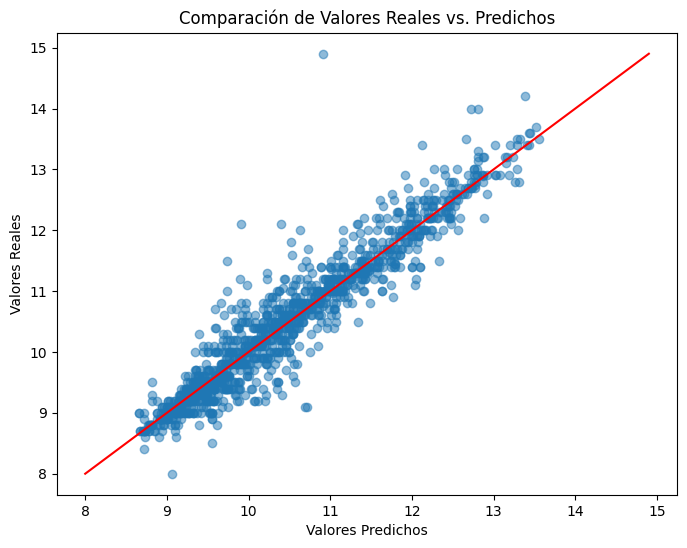

In [91]:
plot_predictions_vs_actual(y_test_r, pred_test)

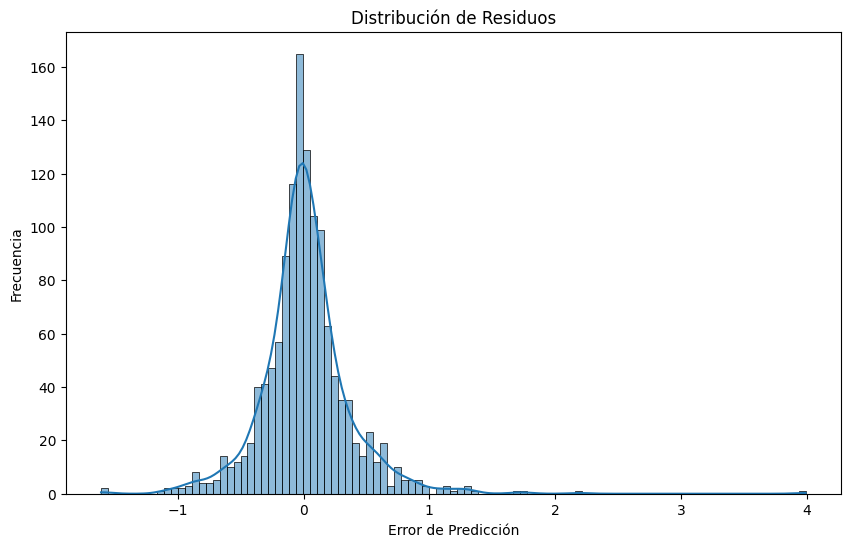

In [92]:
residuos = y_test_r - pred_test

# Visualización de residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.title('Distribución de Residuos')
plt.xlabel('Error de Predicción')
plt.ylabel('Frecuencia')
plt.show()

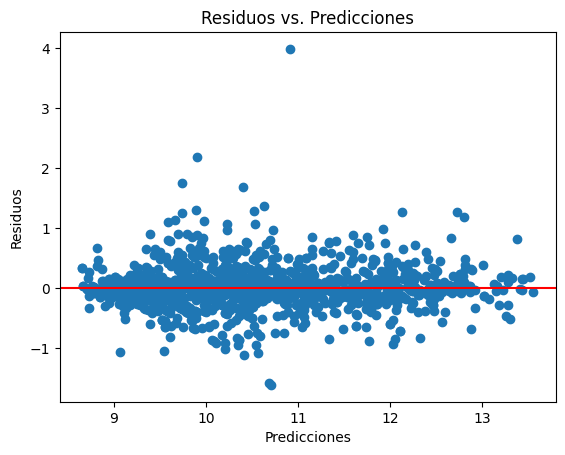

In [93]:
plt.scatter(pred_test, residuos)
plt.title('Residuos vs. Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

*Es un buen modelo, aunque tiene bastante varianza, está un poco sobreajustado, pero aún así generaliza bien, el resultado para test también es bueno, se equivoca de media tan solo un 2% y parece que se equivoca más hacia arriba o al menos puede equivocarse con una mayor distancia. Dejo cargando otro modelo con valores que eviten el sobreajuste en los hiperparámetros a ver si consigo reducir la varianza.*

In [99]:
param_grid = {"max_depth": [3, 6, 12, 15],
              "learning_rate": [0.1, 0.3, 0.6, 1],
              "n_estimators": [100, 200, 400],
              "min_child_samples": [1, 20, 50, 100],
              "subsample": [0.5, 1],
              "colsample_bytree": [0.5, 1],
              "subsample_for_bin": [125, 250, 500, 1000, 2000],
              "num_leaves": [16, 31, 62, 100]}

lgbmr = LGBMRegressor()

clf = RandomizedSearchCV(lgbmr,
                         param_distributions= param_grid,
                         n_iter= 70,
                         cv= 5,
                         random_state=42,
                         scoring = "neg_mean_squared_error",
                         n_jobs= -1)
clf.fit(X_train_r, y_train_r)

RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=70, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 1],
                                        'learning_rate': [0.1, 0.3, 0.6, 1],
                                        'max_depth': [3, 6, 12, 15],
                                        'min_child_samples': [1, 20, 50, 100],
                                        'n_estimators': [100, 200, 400],
                                        'num_leaves': [16, 31, 62, 100],
                                        'subsample': [0.5, 1],
                                        'subsample_for_bin': [125, 250, 500,
                                                              1000, 2000]},
                   random_state=42, scoring='neg_mean_squared_error')

In [100]:
-clf.best_score_

np.float64(0.1393431735981288)

In [101]:
clf.best_params_

{'subsample_for_bin': 1000,
 'subsample': 1,
 'num_leaves': 100,
 'n_estimators': 200,
 'min_child_samples': 20,
 'max_depth': 12,
 'learning_rate': 0.1,
 'colsample_bytree': 1}

In [102]:
lgbmr = clf.best_estimator_

pred_train = lgbmr.predict(X_train_r)
pred_test = lgbmr.predict(X_test_r)
rmse_train = root_mean_squared_error(y_train_r, pred_train)
mae_train = mean_absolute_error(y_train_r, pred_train)
mape_train = mean_absolute_percentage_error(y_train_r, pred_train)
print(f"Métricas train: RMSE = {rmse_train}; MAE = {mae_train}; MAPE = {mape_train}")

rmse_test = root_mean_squared_error(y_test_r, pred_test)
mae_test  = mean_absolute_error(y_test_r, pred_test)
mape_test  = mean_absolute_percentage_error(y_test_r, pred_test)
print(f"Métricas train: RMSE = {rmse_test }; MAE = {mae_test }; MAPE = {mape_test }")

Métricas train: RMSE = 0.11827433161650766; MAE = 0.0837753403229473; MAPE = 0.007979942930849592
Métricas train: RMSE = 0.36004491586426873; MAE = 0.23923464972408082; MAPE = 0.022662468362916396
